In [79]:
from covid.simulator import Population
from covid.auxilliary import symptom_names
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from covid.policy import Policy
from scipy.stats import beta, bernoulli, uniform

In [80]:
class ThompsonSampling:
    def __init__(self, nvacc):
        # Priors for the beta-bernoulli model
        self.a = np.ones(nvacc) # uniform prior
        self.b = np.ones(nvacc) # uniform prior
        self.nvacc = nvacc

    def update(self, action, outcome):
        self.a[action] += outcome
        self.b[action] += 1 - outcome

    def get_params(self):
        # Returns the parameters of all the beta distrobutions.
        return self.a, self.b

    def get_prob(self):
        return beta.rvs(self.a, self.b)

In [81]:
class Naive(Policy):
    def set_model(self, model):
        self.model = model
    
    def get_action(self):
        probs = self.model.get_prob()
        
        #print(probs)
        ret_val = np.argmax(probs)
        #print(ret_val)
        #print(ret_val)
        return ret_val

    def observe(self, action, outcome):
        self.model.update(action, outcome)
        

In [82]:
thetas = np.array([0.6, 0.55, 0.5])

In [83]:
n_genes = 128
n_vaccines = 3
n_treatment = 4
#population = Population(n_genes, n_vaccines, n_treatment)
N = 10000
#X = population.generate(N)

In [84]:
policy = Naive(n_actions=3, action_set=[0, 1, 2])
model = ThompsonSampling(nvacc=3)
policy.set_model(model)

action_arr = np.zeros(N)
symptom_arr = np.zeros(N)

for i in range(N):
    action = policy.get_action()
    #print(thetas[action])
    reward = bernoulli.rvs(thetas[action])
    print(reward)
    policy.observe(action, reward)
    action_arr[i] = action
    symptom_arr[i] = reward

    #print(action, reward)
    #policy.observe(action, reward)
    #print(action)

alphas, betas = policy.model.get_params()
for i, j in zip(alphas, betas):
    print(i,j)
print(alphas[0]/(alphas[0] + betas[0]))
print(alphas[1]/(alphas[1] + betas[1]))
print(alphas[2]/(alphas[2] + betas[2]))


Initialising policy with  3 actions
A = { [0, 1, 2] }
1
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
1
1
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
1
0
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
0
0
1
1
0
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
1
1
1
1
0
1
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
0
1
1
0
1
0
0
1
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
0
1
1
1
0
1
0
0
0
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
1


(array([9338.,    0.,    0.,    0.,    0.,  462.,    0.,    0.,    0.,
         200.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

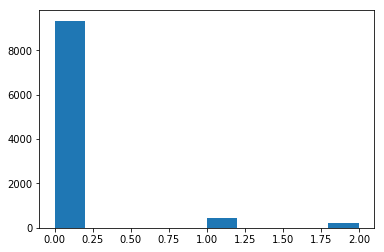

In [88]:
#print(action_arr)
#plt.scatter(range(N), action_arr)
plt.hist(action_arr)

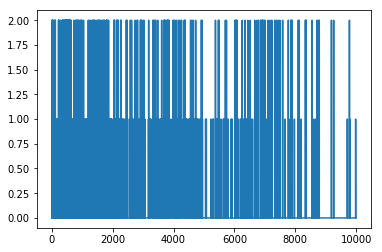

In [85]:
plt.plot(ranaction_arr)